# KNN Project Exercise

## Detecting a rock or a mine

### Data set https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data import

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<AxesSubplot:>

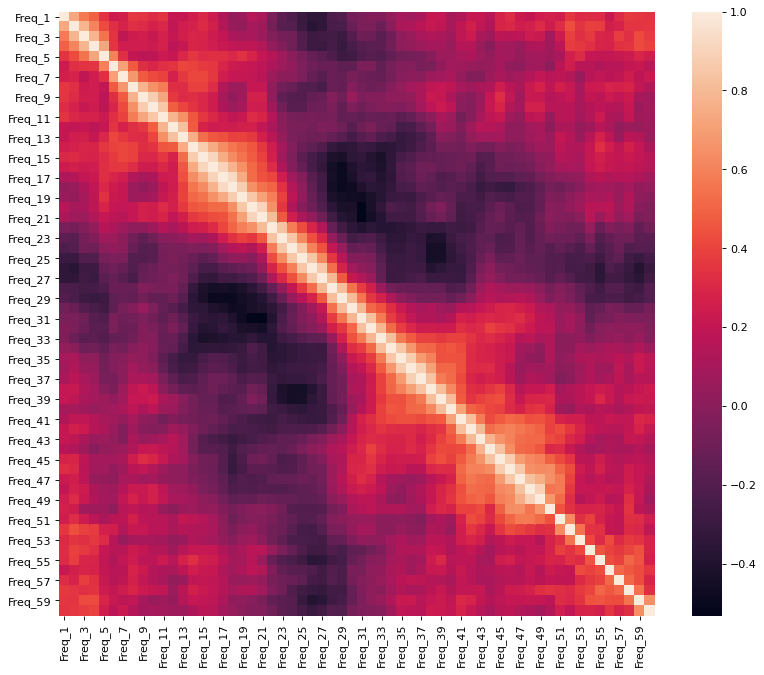

In [11]:
fig = plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(df.corr())

In [13]:
df['Label'].unique()

array(['R', 'M'], dtype=object)

In [16]:
df = df.replace(['M','R'],[1,0])

In [17]:
df['Label'].unique()

array([0, 1])

In [30]:
top_corr = df.corr()['Label'].abs().sort_values()

In [48]:
top_corr.tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

### Train/test data split

In [49]:
#features
X = df.drop('Label',axis=1)

#labels
y = df['Label']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Model

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [57]:
scaler = StandardScaler()

In [58]:
knn = KNeighborsClassifier()

In [63]:
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

In [60]:
k_values = list(range(1,30))

In [70]:
param_grid = {'knn__n_neighbors':k_values}

In [71]:
full_classifier_model = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [72]:
full_classifier_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [74]:
full_classifier_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [78]:
mts = full_classifier_model.cv_results_['mean_test_score']

Text(0.5, 0, 'K Neighbors')

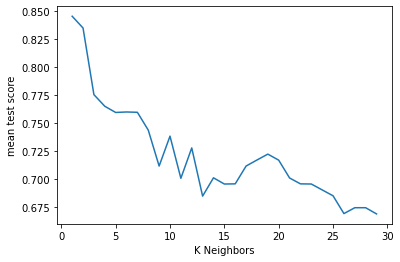

In [79]:
plt.plot(range(1,30),mts)
plt.ylabel('mean test score')
plt.xlabel('K Neighbors')

### Final model evaluation

In [82]:
full_y_pred = full_classifier_model.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(classification_report(y_test,full_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [87]:
confusion_matrix(y_test,full_y_pred)

array([[ 7,  1],
       [ 1, 12]])